# **Shifa Fanisatuz Zahra**
# **2310631170049**
# **5A**

## **Import Library**

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# load data Used Cars Price Prediction
!wget https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv

--2025-10-05 02:55:30--  https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 602640 (589K) [text/plain]
Saving to: ‘used_cars_price_fiks.csv’

used_cars_price_fik 100%[===================>] 588.52K  --.-KB/s    in 0.008s  

2025-10-05 02:55:30 (70.9 MB/s) - ‘used_cars_price_fiks.csv’ saved [602640/602640]



## **Data Profiling**

In [3]:
# Menyimpan ke dalam variabel dataset
df = pd.read_csv("used_cars_price_fiks.csv")
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [4]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  5719 non-null   float64
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


terlihat ada 13 kolom, dengan kategori 5 kolom dan numerik 8 kolom. Baris datasetnya ada 6019 baris

In [5]:
# Menampilkan nilai statistika deskriptif setiap variabel numerik di dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6019.0,3009.000000,1737.679967,0.00,1504.50,3009.00,4513.50,6018.00
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,5719.0,57545.592586,37988.496154,171.00,33923.00,53000.00,72998.00,775000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.10,560.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


## **EDA (Exploratory Data Analysis)**

In [6]:
# Membuuat kolom brand dari Name
df['Brand'] = df['Name'].str.split().str[0]

# Cek jumlah brand unik
print(df['Brand'].nunique())
print(df['Brand'].value_counts().head(10))  # lihat 10 brand paling sering muncul

31
Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Name: count, dtype: int64


saya mengubah kolom Name jadi Brand karena di kolom tersebut sebenarnya yang lebih penting diambil adalah mereknya, bukan detail nama mobil secara lengkap

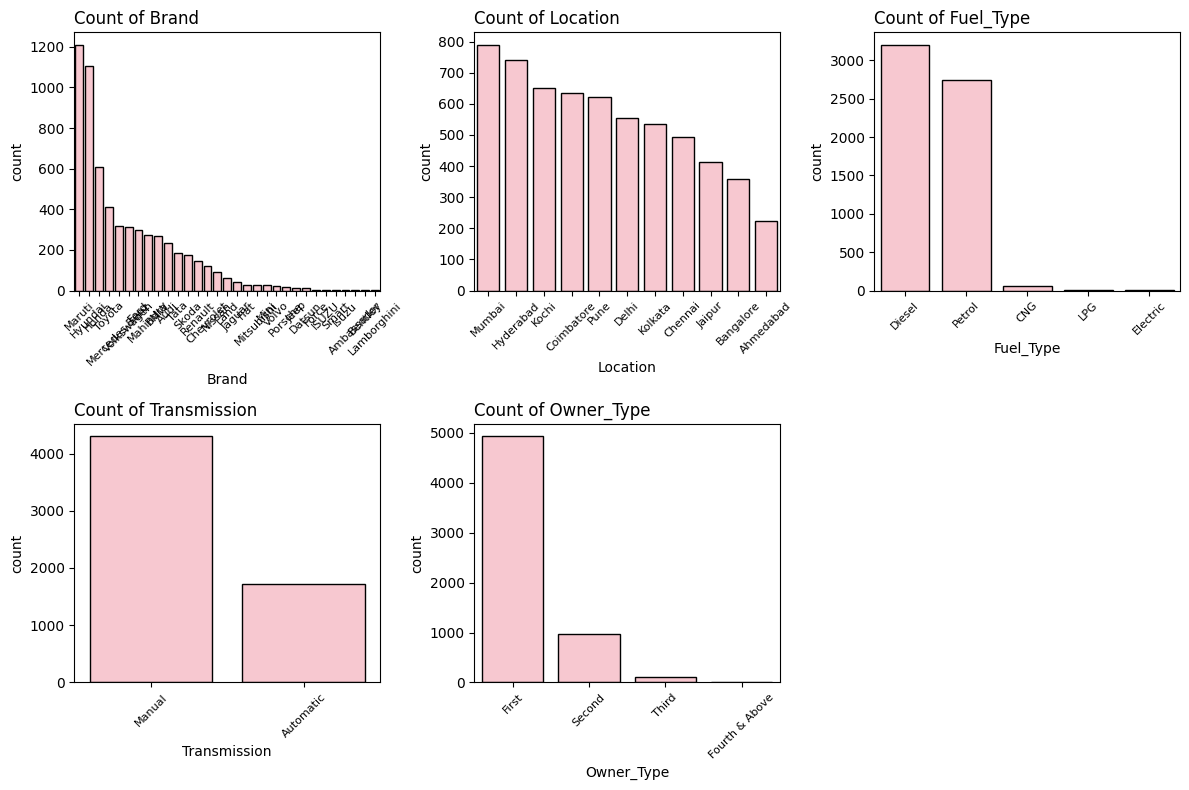

In [7]:
# Mengecek distribusi data kategorikal pada dataset
categorical_col = ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

n_cols = 3
n_rows = (len(categorical_col) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_col):
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        ax=axes[i],
        color="pink",
        edgecolor="black"
    )
    axes[i].set_title(f"Count of {col}", loc='left', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)  # kecilin font biar ga numpuk
    axes[i].tick_params(axis='y', labelsize=10)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

kolom Brand agak susah dibaca karena ada sekitar 31 merek mobil. Grafiknya jadi padet banget, tapi ini menunjukan kalau datanya cukup beragam, bukan cuma fokus di satu brand tertentu.

kalau di Location, distribusi datanya lumayan bervariasi juga, karena kotanya ada banyak. contohnya kota Mumbai, Hyderabad data mobil bekas di kota itu lebih banyak dibanding kota lain

di Fuel_Type, kelihatan jelas kalau mobil dengan bahan bakar Diesel & Petrol jumlahnya paling banyak

untuk Transmission, sebagian besar mobil masih pakai transmisi manual, sedangkan otomatis jumlahnya lebih sedikit

kolom Owner_Type, mayoritas mobil adalah First Owner

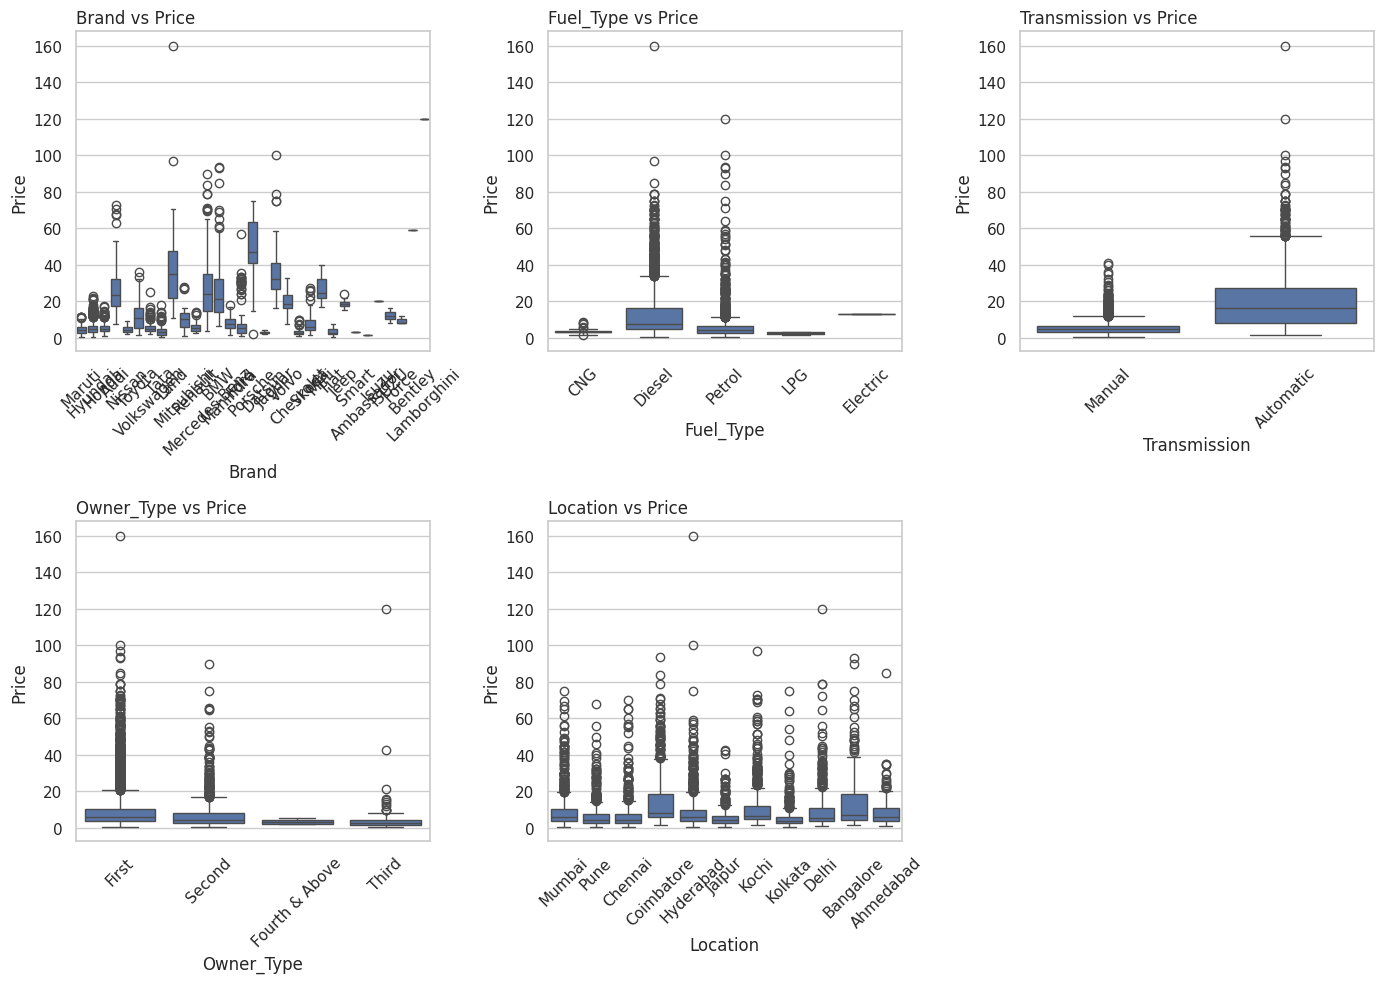

In [ ]:
# Hubungan variabel kategorikal dengan Price
cat_cols = ['Brand', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Location']

n_cols = 3   # jumlah kolom grid
n_rows = (len(cat_cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(data=df, x=col, y="Price", ax=axes[i])
    axes[i].set_title(f"{col} vs Price", loc='left')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

kalau dilihat dari Brand, tiap merek punya rentang harga yang beda-beda, jadi brand memang cukup berpengaruh ke harga

di Fuel_Type, mobil diesel cenderung punya harga lebih tinggi dibanding Petrol. Sedangkan yang lainnya lebih murah. Jadi jenis bahan bakar ada hubungannya juga sama harga

kalau Transmission, mobil automatic punya harga lebih tinggi daripada manual

untuk Owner_Type, jelas mobil dengan First Owner punya harga yang lebih tinggi. Karena semakin banyak kali ganti pemilik, biasanya harganya makin rendah

untuk Location, harga mobil juga nggak sama di tiap kota. Kota besar biasanya punya harga lebih tinggi dibanding kota lain

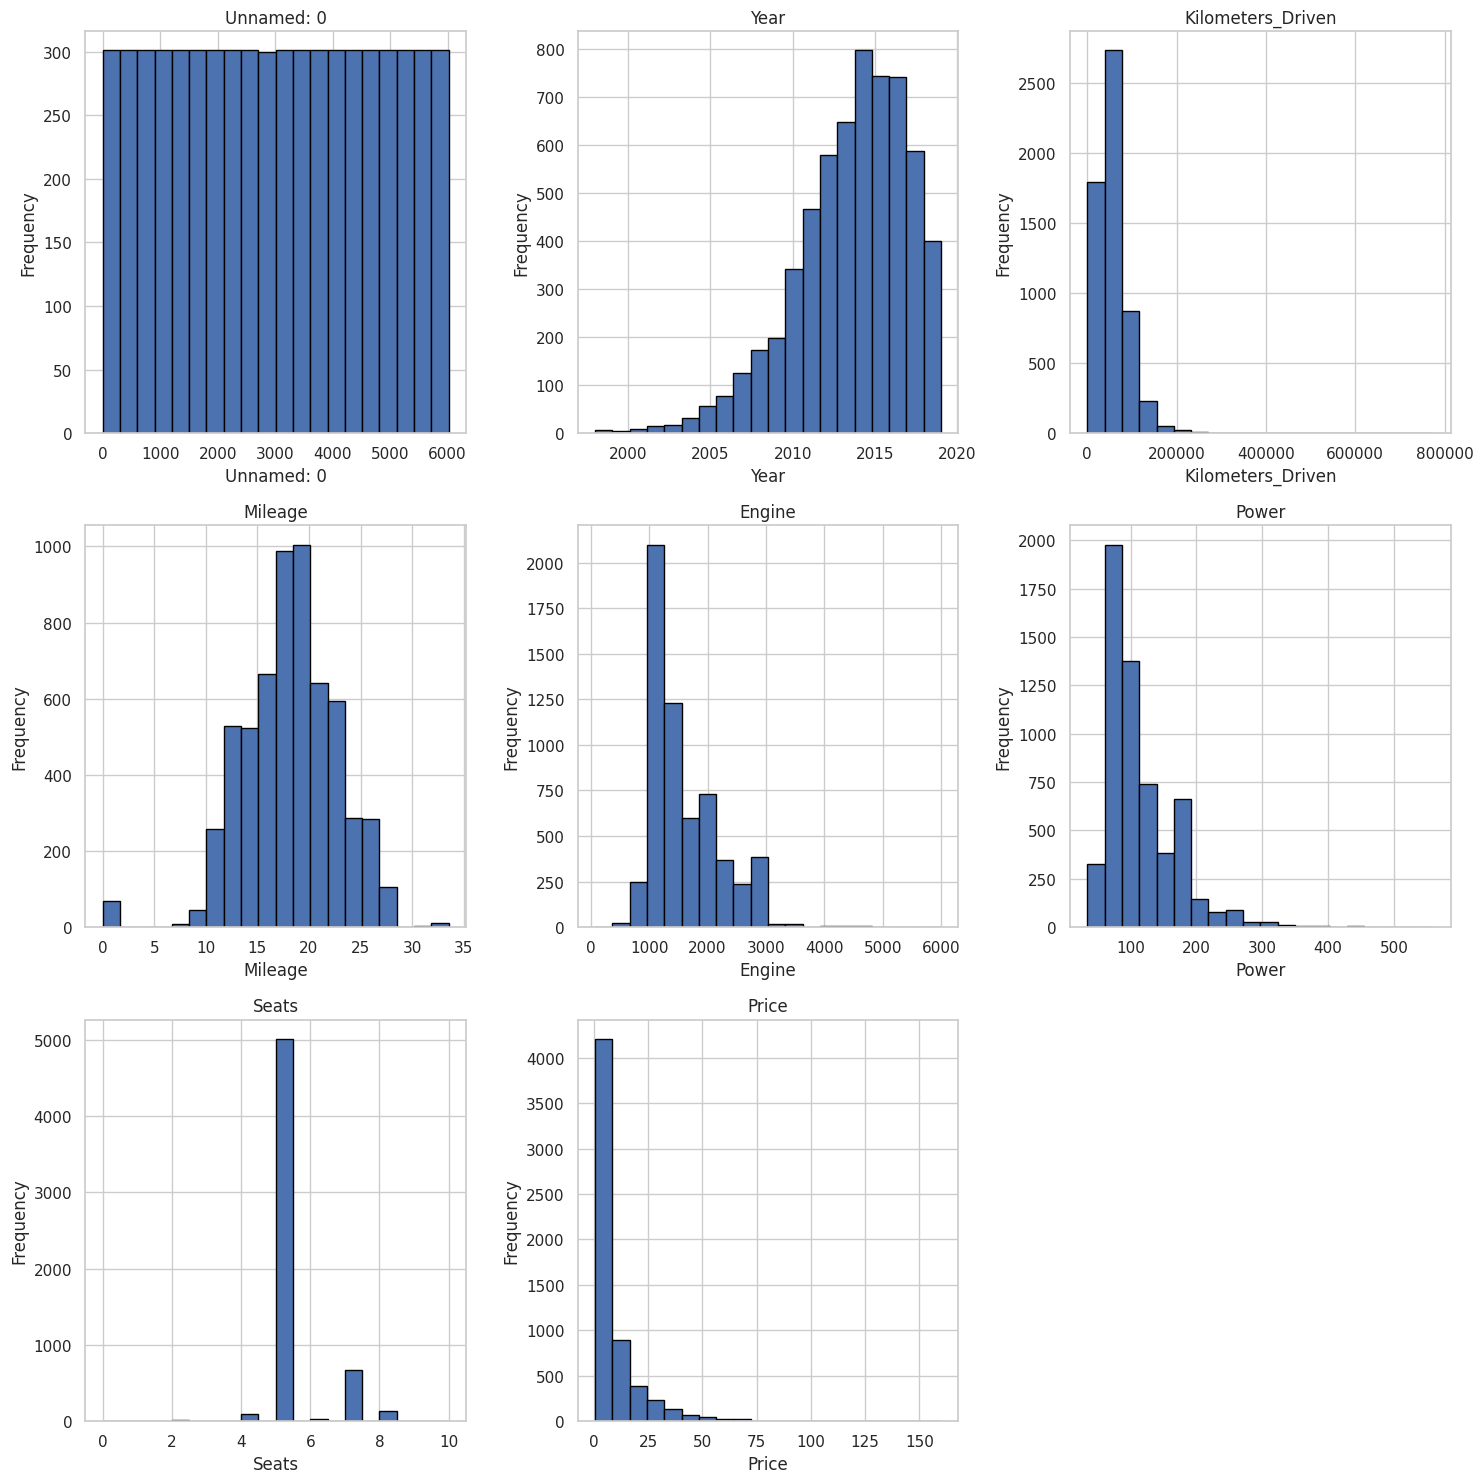

In [ ]:
# Mengecek distribusi data numerik pada dataset
numeric_col = df.select_dtypes(include=np.number).columns

sns.set(style="whitegrid")

n_cols = 3
n_rows = (len(numeric_col) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()
for i, col in enumerate(numeric_col):
    ax = axes[i]
    ax.hist(df[col], bins=20, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')


for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

sebagian besar kolom ternyata tidak normal karena condong ke satu sisi (skewed). Misalnya, di Kilometers_Driven banyak mobil dengan jarak tempuh rendah, tapi ada juga sedikit yang sangat tinggi, jadi grafiknya ketarik ke kanan. sama juga kelihatan di Engine dan Power, ada beberapa nilai ekstrem yang bikin distribusinya tidak seimbang. Sementara untuk kolom Price, juga terlihat skewed ke kanan karena ada sedikit mobil mewah dengan harga sangat tinggi. Jadi intinya, distribusi data numerik ini lebih banyak condong

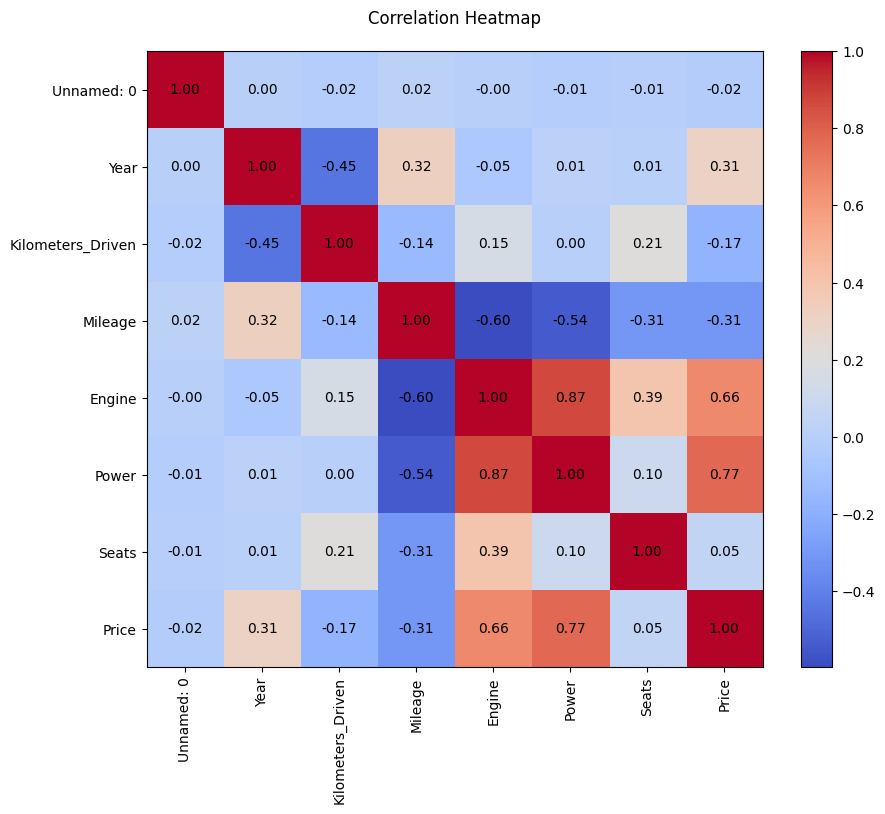

In [8]:
# Mengecek korelasi antar data numerik dengan heatmap
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black')

plt.title("Correlation Heatmap", pad=20)
plt.show()

dari hasil heatmap, bisa kelihatan kalau harga mobil (Price) cukup dipengaruhi sama beberapa variabel. Yang paling keliatan itu adalah Power dan Engine, makin besar tenaga dan kapasitas mesin, harganya juga lebih mahal. tahun mobil (Year) juga berpengaruh, mobil keluaran baru biasanya punya harga lebih tinggi. kalo Kilometers_Driven punya hubungan negatif dengan Price, artinya makin jauh jarak tempuh, harga mobilnya biasanya lebih murah. untuk Seats hampir tidak berpengaruh ke Price, kalau Mileage ada pengaruh tapi tidak terlalu besar. Selain itu, kelihatan juga kalau Engine dan Power saling berhubungan erat, karena mesin yang besar biasanya tenaganya juga lebih besar

## **Data Cleaning**

### Remove Null Value

In [ ]:
# Buat salinan data untuk preprocessing
df_clean = df.copy()

In [ ]:
# Mengecek nilai Null pada dataset
df_clean.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,300
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


ada beberapa kolom yang memiliki nilai null, misalnya pada kolom Kilometers_Driven sebanyak 300 data kosong, kolom Power ada 143, kolom Seats ada 42, dan kolom Engine ada 36, kolom Mileage juga terdapat 2 data kosong

karena kalau digabung nilai null ini bakal cukup banyak, jadi saya menanganinya dengan beberapa cara, yaitu:
- imputasi median untuk kolom Kilometers_Driven, Engine, dan Power karena data kolomnya skewed, jadi lebih aman pakai median daripada mean
- imputasi modus untuk kolom seats karena karena kolom ini berisi data kategori diskrit (misalnya 4 atau 5 kursi yang sering muncul)
- dan menghapus pada kolom mileage karena jumlahnya sangat sedikit, cuman 2

In [ ]:
# Mengatasi dengan imputasi median untuk kolom Kilometers_Driven, Engine, dan Power
median_cols = ['Kilometers_Driven', 'Engine', 'Power']
for col in median_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [ ]:
# Mengatasi dengan imputasi mean untuk kolom Seats
df_clean['Seats'] = df_clean['Seats'].fillna(df_clean['Seats'].mode()[0])

In [ ]:
# Mengatasi dengan menghapus, karena cuman 2
df_clean = df_clean.dropna(subset=['Mileage'])

In [ ]:
print("Missing value setelah cleaning:\n")
print(df_clean.isnull().sum())

Missing value setelah cleaning:

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64


sudah tidak ada nilai null

### Remove Duplicate Value

In [ ]:
# Cek duplikasi dataset
df_clean.duplicated().sum()

np.int64(0)

dataset ini tidak memiliki duplikasi data, jadi langsung ke tahap selanjutnya

### Remove Column Unnamed & Name

In [ ]:
# Menghapus kolom Unnamed dan Name
df_clean.drop(['Unnamed: 0', 'Name'], axis=1, inplace=True)

print(df_clean.columns)

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Brand'],
      dtype='object')


karena kolom Unnamed dia tidak punya arti apa-apa, cuman index bawaan dari dataset, jadi lebih baik dihapus dan Name sudah diganti Brand karena yang paling penting dari kolom itu adalah merek mobilnya, bukan nama lengkap unit mobilnya

### Remove Outliers

In [ ]:
# Membuat salinan data
df_outlier = df_clean.copy()

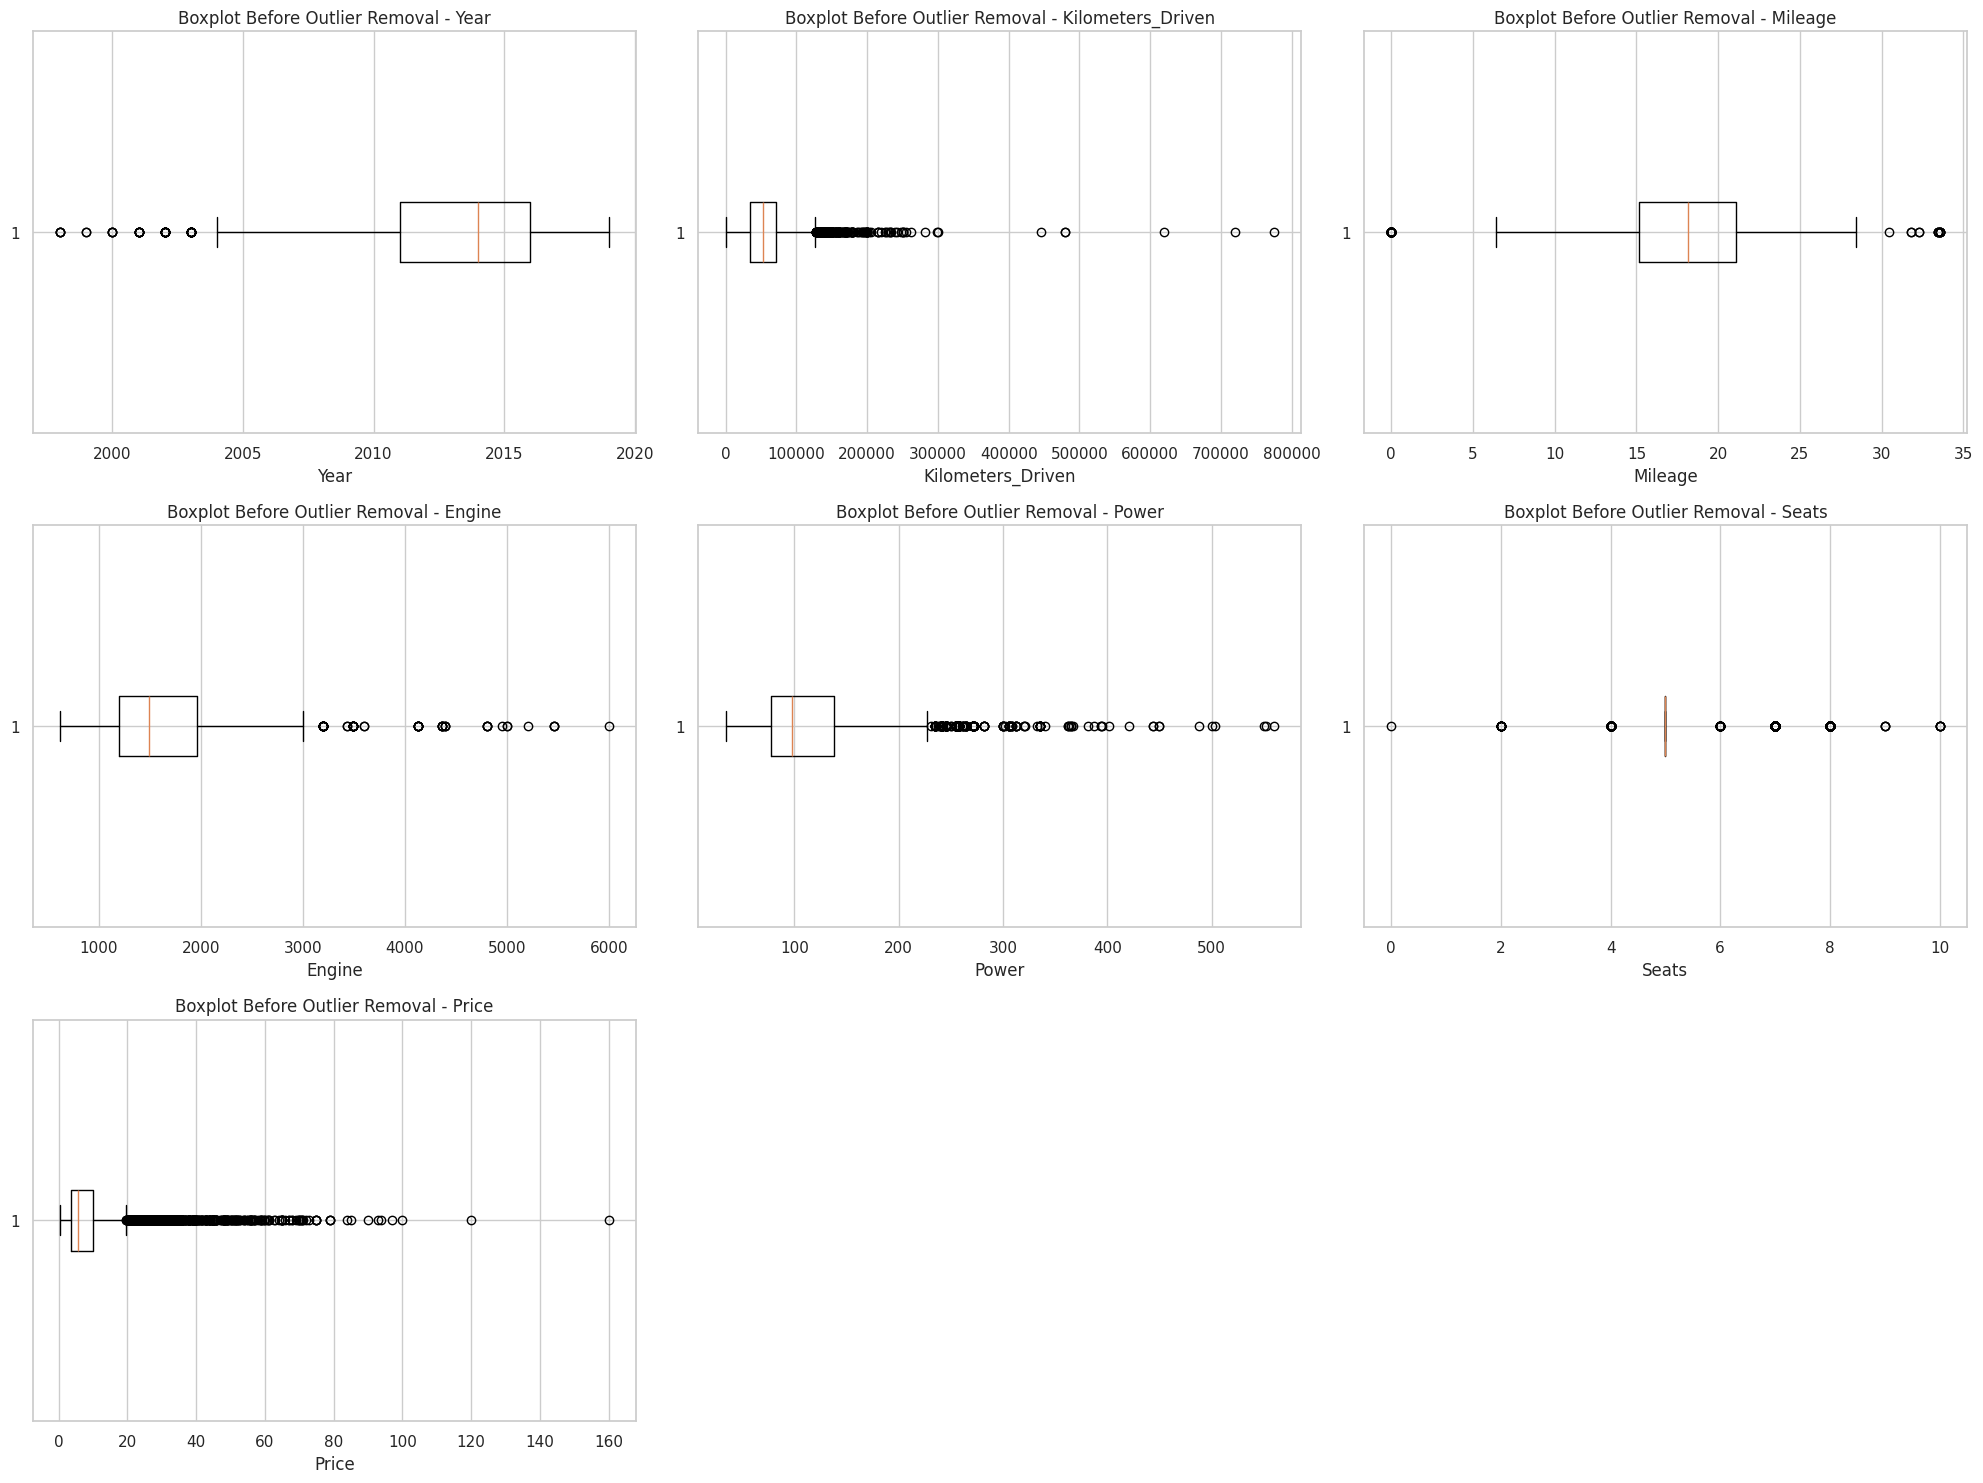

In [ ]:
# Mengecek boxplot sebelum diatasi outliernya
num_cols = df_outlier.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_outlier[col], vert=False)
    axes[i].set_title(f'Boxplot Before Outlier Removal - {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Fungsi untuk mendeteksi outlier dengan IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outlier = df[(df < lower_bound) | (df > upper_bound)]
    return df_outlier

# Menghitung jumlah outlier tiap kolom dan simpan dalam dictionary
outlier_counts = {}
for col in num_cols:
    outliers = detect_outliers_iqr(df_outlier[col])
    outlier_counts[col] = len(outliers)

# Membuuat DataFrame dari dictionary
outlier_summary_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])

# Menampilkan hasilnya
print("Jumlah outlier per kolom (IQR method):")
display(outlier_summary_df)

Jumlah outlier per kolom (IQR method):


,Outlier Count
Year,50
Kilometers_Driven,224
Mileage,82
Engine,61
Power,239
Seats,963
Price,718


jumlah outlier beda-beda tiap kolom, paling banyak ada di Seats dan Price. Outlier ini perlu dicek lagi apakah masuk akal atau justru error data, supaya bisa diputuskan cara menanganinya

- untuk Year, saya batasi antara 1990–2022 karena di luar itu sudah terlalu lama atau terlalu baru

- untuk Seats, saya hapus data di luar 2–9 kursi. Alasannya saya tidak menganggap kursi lebih dari 9 wajar karena kalau dilihat dari brand yang ada di dataset ini, semuanya seperti mobil pribadi, bukan bus atau kendaraan besar

- untuk kolom numerik lain seperti Kilometers_Driven, Engine, Power, Mileage, dan Price, saya pakai capping

In [ ]:
# Menangani outlier di kolom Year
df_outlier = df_outlier[(df_outlier['Year'] >= 1990) & (df_outlier['Year'] <= 2022)].copy()

# Menangani outlier di kolom Seats
df_outlier = df_outlier[(df_outlier['Seats'] >= 2) & (df_outlier['Seats'] <= 9)].copy()

# Menangani outlier di kolom lainnya
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df.loc[df[col] < lower, col] = lower
    df.loc[df[col] > upper, col] = upper

    return df

for col in ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']:
    df_outlier = cap_outliers(df_outlier, col)

print("Jumlah baris setelah outlier handling:", df_outlier.shape[0])
print("\nDistribusi Seats setelah filter:\n", df_outlier['Seats'].value_counts())
print("\nOutlier sudah ditangani dengan capping & filtering")


Jumlah baris setelah outlier handling: 6011

Distribusi Seats setelah filter:
 Seats
5.0    5054
7.0     674
8.0     134
4.0      99
6.0      31
2.0      16
9.0       3
Name: count, dtype: int64

Outlier sudah ditangani dengan capping & filtering


jumlah data tinggal 6011 baris. Di kolom Seats, hasilnya jadi lebih wajar: kebanyakan mobil punya 5 kursi (5054 data), sisanya ada yang 7 kursi, 8 kursi, 4 kursi, sampai ada juga yang cuma 2 kursi atau 9 kursi tapi jumlahnya sedikit

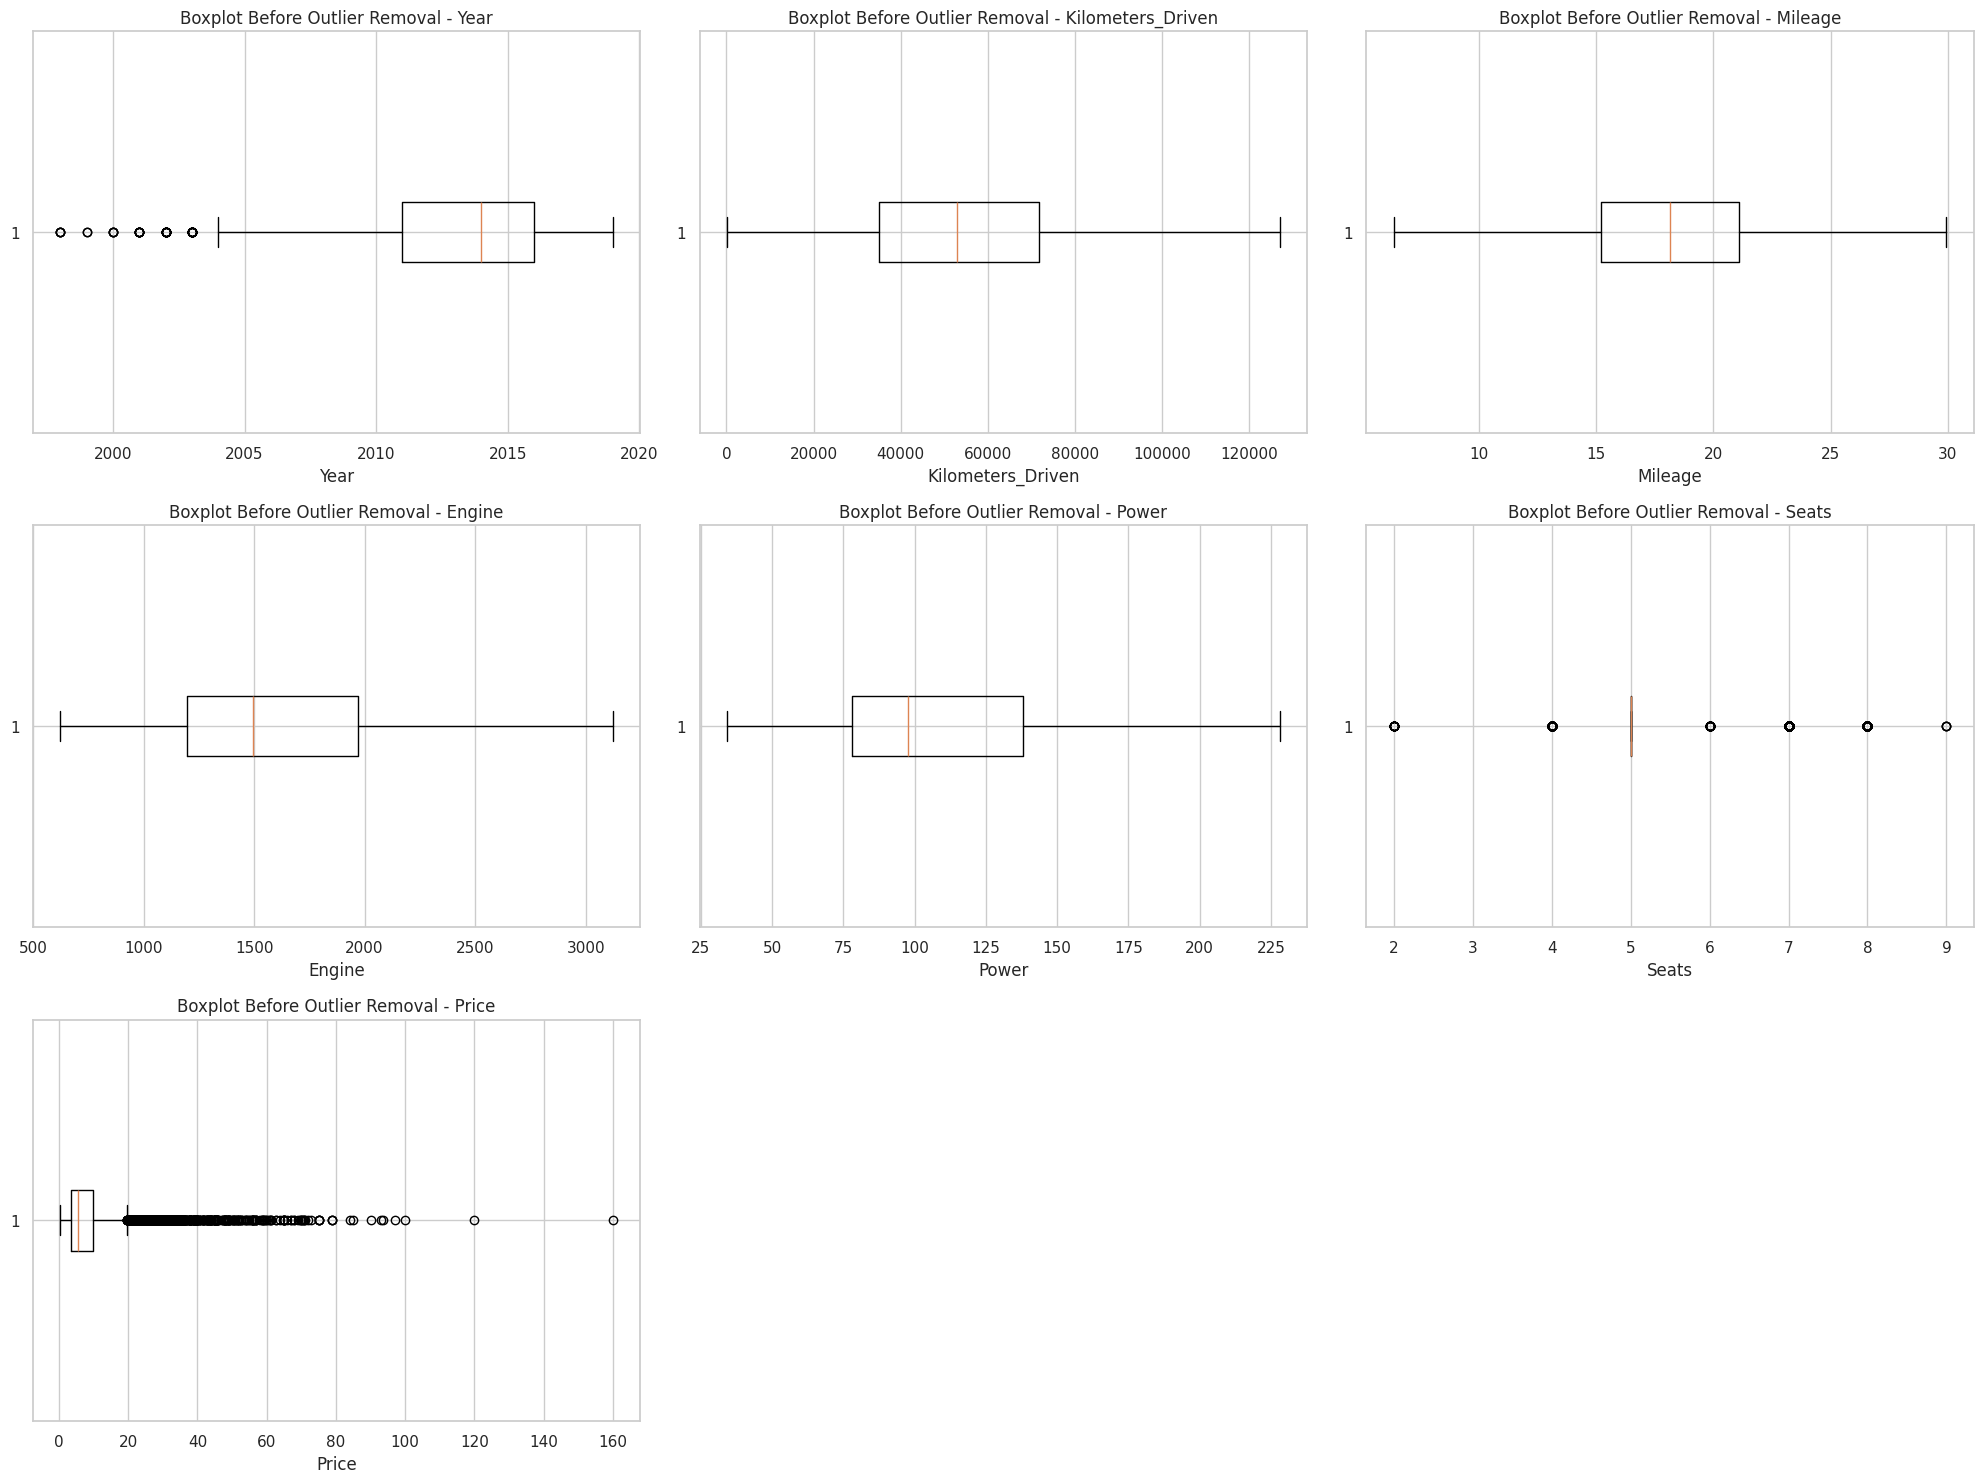

In [ ]:
# Mengecek boxplot setelah diatasi outliernya
num_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_outlier[col], vert=False)
    axes[i].set_title(f'Boxplot Before Outlier Removal - {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Data Transformations**

In [ ]:
df_transformed = df_outlier.copy()

### Feature Engineering

In [ ]:
# Membuat kolom Age (usia mobil)
df_transformed['Age'] = 2025 - df_transformed['Year']

# Menghapus kolom Year karena sudah diganti dengan Age
df_transformed.drop('Year', axis=1, inplace=True)

saya menambahkan kolom baru Age dari kolom Year karena umur mobil lebih relevan untuk melihat hubungannya dengan Price dibandingkan cuman menggunakan tahunnya doang secara langsung

## One-Hot Encoding untuk Kategori

In [ ]:
# One-Hot Encoding untuk kategori
categorical_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']
df_transformed = pd.get_dummies(df_transformed, columns=categorical_cols, drop_first=True)

saya mengubah kolom kategori (seperti Fuel_Type, Transmission, Owner_Type, Location, dan Brand) menjadi numerik. Jadi tiap kategori akan dibuatkan kolom baru dengan nilai 0 atau 1

In [ ]:
print("\nDimensi akhir dataset:", df_transformed.shape)
print("Cek missing value:\n", df_transformed.isnull().sum().sum())


Dimensi akhir dataset: (6011, 54)
Cek missing value:
 0


dimensi akhirnya jadi (6011, 54) karena barisnya yang tadinya 6019 berkurang jadi 6011 setelah proses outlier (misalnya filter data Year dan Seats)

Kolomnya bertambah banyak karena setelah one hot encoding, setiap kategori diubah jadi beberapa kolom baru (misalnya Fuel_Type, Transmission, Owner_Type, Location, dan Brand masing-masing jadi beberapa kolom)

saya tidak melakukan feature selection di tahap ini karena semua fiturnya masih relevan menurut saya, bisa kasih informasi ke model. saya juga sudah coba dengan menghapus kolom seats karena di hasil heatmap dia tidak terlalu berpengaruh terhadap Price. tapi hasilnya tidak lebih baik dari saya menggunakan kolom seast, jadinay saya pakai saja kolom seatsnya

### **Data Final**

In [ ]:
df_final = df_transformed.copy()
print(df_transformed.isnull().sum())

Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Age                          0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Brand_Audi                   0
Brand_BMW                    0
Brand_Bentley                0
Brand_Chevrolet              0
Brand_Datsun                 0
Brand_Fiat                   0
Brand_Force                  0
Brand_Ford                   0
Brand_Ho

In [ ]:
print("Dimensi akhir dataset:", df_final.shape)

Dimensi akhir dataset: (6011, 54)


In [ ]:
print(df_final.dtypes)

Kilometers_Driven            float64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Age                            int64
Location_Bangalore              bool
Location_Chennai                bool
Location_Coimbatore             bool
Location_Delhi                  bool
Location_Hyderabad              bool
Location_Jaipur                 bool
Location_Kochi                  bool
Location_Kolkata                bool
Location_Mumbai                 bool
Location_Pune                   bool
Fuel_Type_Diesel                bool
Fuel_Type_LPG                   bool
Fuel_Type_Petrol                bool
Transmission_Manual             bool
Owner_Type_Fourth & Above       bool
Owner_Type_Second               bool
Owner_Type_Third                bool
Brand_Audi                      bool
Brand_BMW                       bool
Brand_Bentley                   bool
B

## **MODELLING**

In [ ]:
# Memisahkan X (fitur) dan y (target)
X = df_final.drop(columns=['Price'])
y = df_final['Price']

di sini tahap memisahkan fitur (X) dengan target (y) targetnya adalah Price

In [ ]:
# Membagi data training (80%) & data testing(20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran data train:", X_train.shape)
print("Ukuran data test:", X_test.shape)

Ukuran data train: (4808, 53)
Ukuran data test: (1203, 53)


dataset dibagi 80% untuk training (melatih model) dan 20% untuk testing. saya juga mencoba dengan membagi 70% tarining dan 30% testing, tapi tidak cukup baik, jadi tetap pakai yang 80% dan 20% saja

In [ ]:
# Data Scalling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

supaya semua fitur numerik berada pada skala yang sama

In [ ]:
# Tahap linear regressionnya
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

 melatih model Linear Regression menggunakan data training agar model bisa belajar hubungan antara fitur dan target

## **EVALUASI MODEL**

In [ ]:
# Prediksi
y_pred = model.predict(X_test_scaled)

Model yang sudah dilatih dipakai untuk memprediksi harga (Price) pada data testing

In [ ]:
# Evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R²   :", r2)
print("MAE  :", mae)
print("MSE  :", mse)
print("RMSE :", rmse)

R²   : 0.753632194966861
MAE  : 2.9763533831684303
MSE  : 26.277938604894207
RMSE : 5.126201186540985


- R² = 0.75, model bisa jelasin sekitar 75% variasi harga mobil dari data yang ada. Jadi bisa dibilang cukup bagus
- MAE = 2.97, rata-rata prediksi harga meleset sekitar 3 satuan dari harga asli
- MSE = 26.27, ini angka error yang dihitung dengan kuadrat, jadi lebih besar nilainya
- RMSE = 5.12, kalau dirata-rata, model salah prediksi sekitar 5 satuan harga

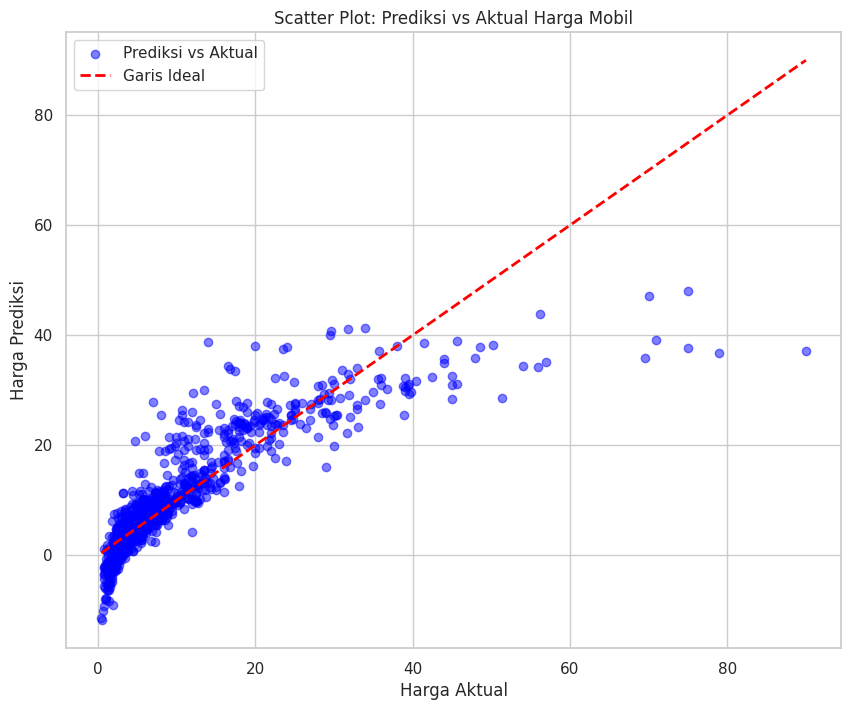

In [ ]:
# Visualsasi menggunakan scatter Plot
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Prediksi vs Aktual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2, label="Garis Ideal")

plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Scatter Plot: Prediksi vs Aktual Harga Mobil")
plt.legend()
plt.show()

ini nunjukin perbandingan antara harga mobil asli (sumbu X) dan hasil prediksi model (sumbu Y). Titik biru itu mewakili tiap mobil, makin dekat ke garis merah putus-putus berarti prediksi makin akurat. Dari pola yang ada, kebanyakan mobil harganya di bawah 40 juta dan prediksinya cukup dekat dengan harga aslinya. Tapi ada juga titik yang jauh dari garis, terutama di mobil yang harganya mahal, jadi model masih kurang pas buat kasus itu. Bahkan ada prediksi yang negatif, padahal jelas harga mobil nggak mungkin minus. Jadi bisa dibilang model ini cukup oke buat harga rendah sampai menengah, tapi agak lemah kalau dipakai buat harga yang tinggi.